In [12]:
#---------------------------------------------------------------------------------
#Project     : Erasmus + NEON
# Authors    : J. Martin Ayarde , Graciela Corral Briones
# Affiliation: UNC ,UNC
# E-mail     : martin.ayarde@unc.edu.ar , graciela.corral@unc.edu.ar
#---------------------------------------------------------------------------------

In [13]:
#! pip install plotly==5.20.0

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go

In [15]:
def generate_bivariate_gaussian_samples(mx, Cx, num_samples):
    # Cholesky decomposition of the covariance matrix
    L = np.linalg.cholesky(Cx)
    
    # Number of dimensions
    dim = len(mx)
    
    # Generate standard normal random samples
    Z = np.random.randn(num_samples, dim)
    
    # Transform standard normal samples to bivariate Gaussian samples
    X = mx + np.dot(Z, L.T)
    
    return X

In [16]:
def plot_joint_pdf_3d(samples, Cx):
    # Extract x and y coordinates from the samples
    x = samples[:, 0]
    y = samples[:, 1]

    # Calculate KDE for smoother visualization
    kde = multivariate_normal([0, 0], cov=Cx)
    X, Y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

    Z = np.array([kde.pdf([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])
    Z = Z.reshape(X.shape)

    # Plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Probability Density')
    ax.set_title('Joint Probability Density Function (3D)')
    plt.show()

In [17]:
def plot_joint_pdf_contour(samples, Cx):
    # Extract x and y coordinates from the samples
    x = samples[:, 0]
    y = samples[:, 1]

    # Calculate KDE for smoother visualization
    kde = multivariate_normal([0, 0], cov=Cx)
    X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
    Z = np.array([kde.pdf([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])
    Z = Z.reshape(X.shape)

    # Plot contour
    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, cmap='viridis')
    plt.colorbar(label='Probability Density')
    plt.scatter(x, y, color='blue', alpha=0.5, s=10)
    plt.title('Joint Probability Density Function (Contour)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

In [18]:
def plot_joint_pdf_interactive(samples, Cx):

    # Extract x and y coordinates from the samples
    x = samples[:, 0]
    y = samples[:, 1]

    # Calculate KDE for smoother visualization
    kde = multivariate_normal([0, 0], cov=Cx)
    X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
    Z = np.array([kde.pdf([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])
    Z = Z.reshape(X.shape)

    # Create a surface plot
    fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])
    fig.update_layout(title='Joint Probability Density Function (Interactive)',
                      scene=dict(
                          xaxis_title='X',
                          yaxis_title='Y',
                          zaxis_title='Probability Density',
                          camera=dict(
                              up=dict(x=0, y=0, z=1),
                              center=dict(x=0, y=0, z=0),
                              eye=dict(x=-1.25, y=-1.25, z=1.25)
                          )
                      ))
    fig.show()

In [19]:
# Example bivariate gaussian process

mx = np.array([0, 0])  # Mean vector
Cx = np.array([[1, 0], [0, 1]])  # Covariance matrix
num_samples = 10000

samples = generate_bivariate_gaussian_samples(mx, Cx, num_samples)

# Print the first few samples
print("Generated samples:")
print(samples[:5])



Generated samples:
[[-2.30508935  0.67518146]
 [ 0.80472468  1.05139418]
 [ 0.93454318  0.72990412]
 [-0.47263056 -0.64705783]
 [ 0.78094952  1.95578047]]


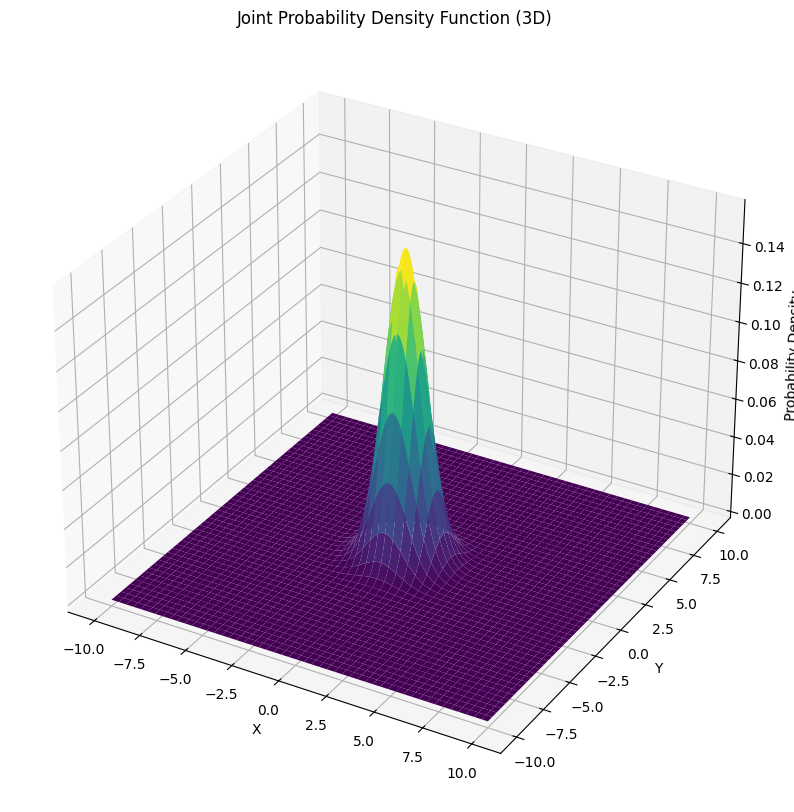

In [20]:
plot_joint_pdf_3d(samples, Cx)

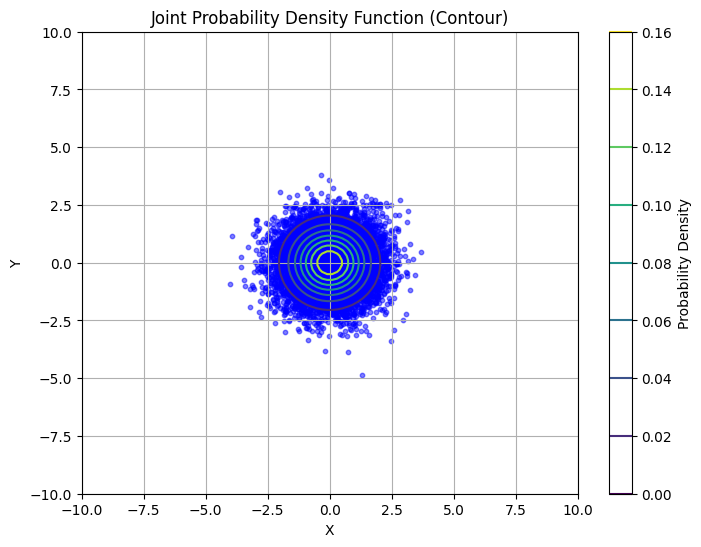

In [21]:
plot_joint_pdf_contour(samples, Cx)

In [22]:
plot_joint_pdf_interactive(samples, Cx)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed